### fase 1

In [5]:
import pandas as pd
from google.colab import files

uploaded = files.upload()


df = pd.read_csv("male_players.csv")
df.head()

Saving male_teams.csv to male_teams.csv


In [8]:
df = pd.read_csv("male_teams.csv",low_memory=False)
df.head()

,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,/team/73/paris-saint-germain/230009,23,9,2023-01-13,Paris Saint Germain,16,Ligue 1,1.0,18,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,/team/243/real-madrid/230009,23,9,2023-01-13,Real Madrid,53,La Liga,1.0,45,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1337,/team/1337/germany/230009,23,9,2023-01-13,Germany,78,Friendly International,NaN,21,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,/team/5/chelsea/230009,23,9,2023-01-13,Chelsea,13,Premier League,1.0,14,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusión del análisis visual


“El dataset contiene información estructurada de equipos de fútbol masculino, incluyendo identificación, liga, nivel competitivo y variables de estilo de juego. Se observa la presencia de valores nulos en varias columnas, lo cual será abordado en la etapa de limpieza de datos.”

In [11]:
df.shape

(385055, 54)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385055 entries, 0 to 385054
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   team_id                      385055 non-null  int64  
 1   team_url                     385055 non-null  object 
 2   fifa_version                 385055 non-null  int64  
 3   fifa_update                  385055 non-null  int64  
 4   fifa_update_date             385055 non-null  object 
 5   team_name                    385055 non-null  object 
 6   league_id                    385055 non-null  int64  
 7   league_name                  385055 non-null  object 
 8   league_level                 359176 non-null  float64
 9   nationality_id               385055 non-null  int64  
 10  nationality_name             385055 non-null  object 
 11  overall                      385055 non-null  int64  
 12  attack                       385055 non-null  int64  
 13 

El dataset contiene 385.055 registros y 54 variables, combinando datos numéricos y categóricos relacionados con el rendimiento, prestigio y características tácticas de equipos de fútbol masculino. Se identificó la presencia de valores nulos en múltiples columnas, especialmente en variables económicas y tácticas, lo cual es esperado en datasets reales y será abordado en la etapa de limpieza de datos.

In [14]:
df.describe()

,team_id,fifa_version,fifa_update,league_id,league_level,nationality_id,overall,attack,midfield,defence,...,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,chance_creation_passing,chance_creation_crossing,chance_creation_shooting
count,385055.000000,385055.000000,385055.000000,385055.000000,359176.000000,385055.000000,385055.000000,385055.000000,385055.000000,385055.000000,...,190030.000000,190030.00000,190030.0,190030.0,242561.000000,242561.000000,242561.000000,242561.000000,242561.000000,242561.000000
mean,44057.920315,18.629630,35.203285,189.029840,1.385480,49.213621,69.100126,69.615948,68.911836,68.342081,...,20.411372,4.34052,3.0,3.0,52.795763,48.911301,51.090216,51.512589,54.053822,53.180243
std,53193.229487,2.239286,21.718802,402.993243,0.759333,47.341016,5.402115,5.898290,5.580269,5.466573,...,24.155680,1.43570,0.0,0.0,10.652442,11.769577,11.047176,12.405511,12.575644,11.848383
min,1.000000,15.000000,1.000000,1.000000,1.000000,4.000000,50.000000,46.000000,48.000000,48.000000,...,3.000000,3.00000,3.0,3.0,23.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,485.000000,17.000000,17.000000,20.000000,1.000000,18.000000,65.000000,66.000000,65.000000,64.000000,...,5.000000,3.00000,3.0,3.0,46.000000,40.000000,41.000000,40.000000,45.000000,45.000000
50%,1877.000000,18.000000,34.000000,60.000000,1.000000,38.000000,69.000000,69.000000,68.000000,68.000000,...,6.000000,4.00000,3.0,3.0,52.000000,50.000000,51.000000,52.000000,54.000000,53.000000
75%,110827.000000,21.000000,52.000000,308.000000,2.000000,54.000000,72.000000,73.000000,72.000000,72.000000,...,50.000000,5.00000,3.0,3.0,61.000000,55.000000,57.000000,61.000000,64.000000,62.000000
max,116361.000000,23.000000,91.000000,2149.000000,5.000000,1037.000000,86.000000,93.000000,89.000000,87.000000,...,81.000000,8.00000,3.0,3.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000


A través del análisis estadístico se observó que las variables de rendimiento presentan distribuciones coherentes y rangos realistas. Se identificaron variables con valores constantes y columnas con alta presencia de valores nulos, lo que permitirá tomar decisiones informadas en la etapa de limpieza y selección de variables.

### Fase 2

In [15]:
df_clean = df.copy()


In [16]:
columnas_relevantes = [
    "team_name",
    "league_name",
    "league_level",
    "nationality_name",
    "overall",
    "attack",
    "midfield",
    "defence",
    "international_prestige",
    "domestic_prestige",
    "transfer_budget_eur",
    "club_worth_eur",
    "starting_xi_average_age",
    "whole_team_average_age"
]

df_clean = df_clean[columnas_relevantes]


In [17]:
df_clean.head()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385055 entries, 0 to 385054
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   team_name                385055 non-null  object 
 1   league_name              385055 non-null  object 
 2   league_level             359176 non-null  float64
 3   nationality_name         385055 non-null  object 
 4   overall                  385055 non-null  int64  
 5   attack                   385055 non-null  int64  
 6   midfield                 385055 non-null  int64  
 7   defence                  385055 non-null  int64  
 8   international_prestige   385055 non-null  int64  
 9   domestic_prestige        359226 non-null  float64
 10  transfer_budget_eur      353133 non-null  float64
 11  club_worth_eur           290093 non-null  float64
 12  starting_xi_average_age  385055 non-null  float64
 13  whole_team_average_age   385055 non-null  float64
dtypes: f

In [18]:
df_clean.isnull().sum()


,0
team_name,0
league_name,0
league_level,25879
nationality_name,0
overall,0
attack,0
midfield,0
defence,0
international_prestige,0
domestic_prestige,25829


In [19]:
df_clean = df_clean.dropna(subset=["overall", "league_name"])


In [20]:
df_clean["league_level"] = df_clean["league_level"].fillna(df_clean["league_level"].median())
df_clean["domestic_prestige"] = df_clean["domestic_prestige"].fillna(df_clean["domestic_prestige"].median())


In [21]:
df_clean.info()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385055 entries, 0 to 385054
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   team_name                385055 non-null  object 
 1   league_name              385055 non-null  object 
 2   league_level             385055 non-null  float64
 3   nationality_name         385055 non-null  object 
 4   overall                  385055 non-null  int64  
 5   attack                   385055 non-null  int64  
 6   midfield                 385055 non-null  int64  
 7   defence                  385055 non-null  int64  
 8   international_prestige   385055 non-null  int64  
 9   domestic_prestige        385055 non-null  float64
 10  transfer_budget_eur      353133 non-null  float64
 11  club_worth_eur           290093 non-null  float64
 12  starting_xi_average_age  385055 non-null  float64
 13  whole_team_average_age   385055 non-null  float64
dtypes: f

,league_level,overall,attack,midfield,defence,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age
count,385055.000000,385055.000000,385055.000000,385055.000000,385055.000000,385055.000000,385055.000000,3.531330e+05,2.900930e+05,385055.000000,385055.000000
mean,1.359572,69.100126,69.615948,68.911836,68.342081,3.797496,6.600319,8.070019e+06,4.800563e+07,26.314331,24.946404
std,0.739696,5.402115,5.898290,5.580269,5.466573,3.460794,3.891992,1.720316e+07,3.066915e+08,1.707628,1.504728
min,1.000000,50.000000,46.000000,48.000000,48.000000,1.000000,1.000000,1.000000e+05,-2.147484e+09,18.820000,19.000000
25%,1.000000,65.000000,66.000000,65.000000,64.000000,1.000000,4.000000,1.200000e+06,5.000000e+06,25.180000,23.960000
50%,1.000000,69.000000,69.000000,68.000000,68.000000,3.000000,6.000000,2.900000e+06,1.300000e+07,26.360000,24.880000
75%,1.000000,72.000000,73.000000,72.000000,72.000000,5.000000,9.000000,7.000000e+06,5.100000e+07,27.450000,25.860000
max,5.000000,86.000000,93.000000,89.000000,87.000000,20.000000,20.000000,1.909000e+08,2.100000e+09,33.640000,33.110000


In [22]:
df_clean.shape


(385055, 14)

### Conclusión del Paso 2

En esta etapa se realizó la limpieza y preparación del dataset, seleccionando variables relevantes para el análisis y aplicando estrategias de tratamiento de valores nulos según el tipo de variable. Estas acciones permitieron obtener un conjunto de datos más consistente, interpretable y adecuado para el análisis exploratorio y visualización.

### fase 3

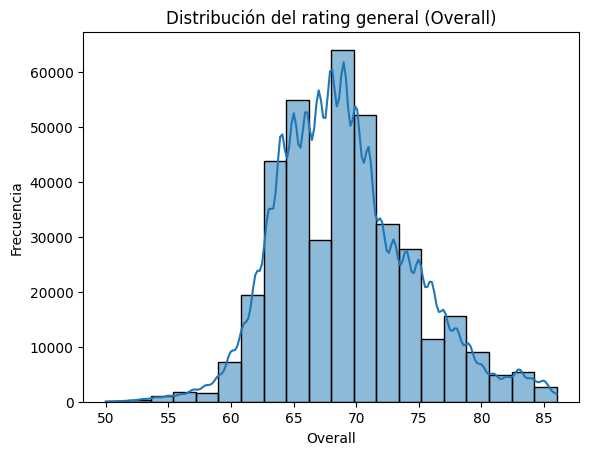

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df_clean["overall"], bins=20, kde=True)
plt.title("Distribución del rating general (Overall)")
plt.xlabel("Overall")
plt.ylabel("Frecuencia")
plt.show()


Conclusión

El nivel competitivo de los equipos se concentra en rangos medios, existiendo un grupo reducido de equipos élite con ratings significativamente superiores.

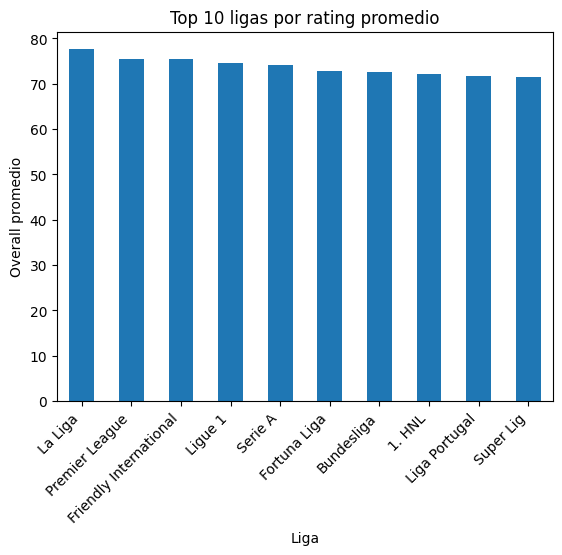

In [24]:
league_overall = (
    df_clean
    .groupby("league_name")["overall"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
league_overall.plot(kind="bar")
plt.title("Top 10 ligas por rating promedio")
plt.xlabel("Liga")
plt.ylabel("Overall promedio")
plt.xticks(rotation=45, ha="right")
plt.show()


Conclusión

Existen diferencias claras en el nivel competitivo entre ligas, destacando aquellas con mayor concentración de equipos de alto rendimiento.

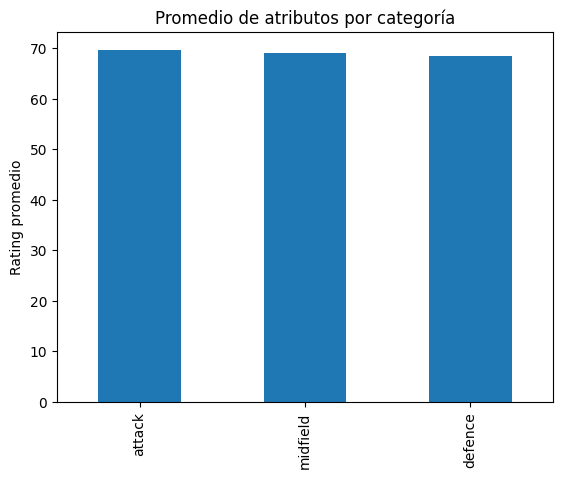

In [25]:
stats_mean = df_clean[["attack", "midfield", "defence"]].mean()

plt.figure()
stats_mean.plot(kind="bar")
plt.title("Promedio de atributos por categoría")
plt.ylabel("Rating promedio")
plt.show()


Conclusión

Los equipos presentan un equilibrio general entre ataque, mediocampo y defensa, lo que sugiere una construcción balanceada del rendimiento en el juego.

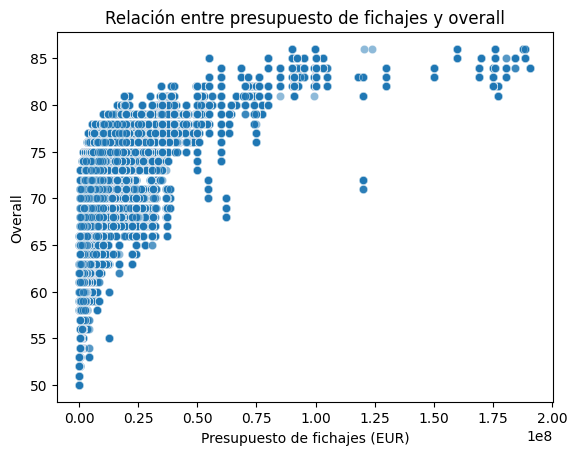

In [26]:
budget_df = df_clean.dropna(subset=["transfer_budget_eur"])

plt.figure()
sns.scatterplot(
    data=budget_df,
    x="transfer_budget_eur",
    y="overall",
    alpha=0.5
)
plt.title("Relación entre presupuesto de fichajes y overall")
plt.xlabel("Presupuesto de fichajes (EUR)")
plt.ylabel("Overall")
plt.show()


Conclusión

Existe una relación positiva entre el presupuesto de fichajes y el rendimiento general, aunque se observan excepciones que evidencian diferencias en eficiencia deportiva.

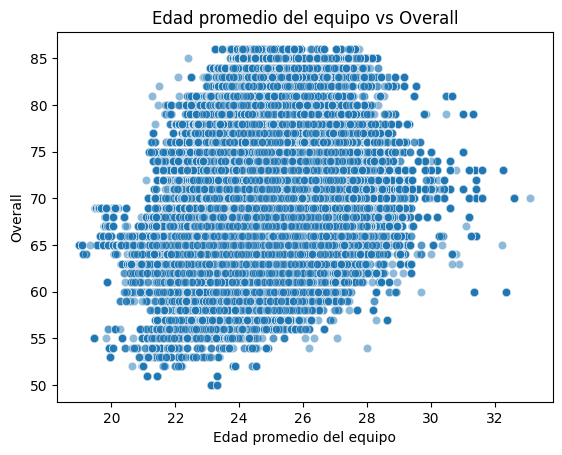

In [27]:
plt.figure()
sns.scatterplot(
    data=df_clean,
    x="whole_team_average_age",
    y="overall",
    alpha=0.5
)
plt.title("Edad promedio del equipo vs Overall")
plt.xlabel("Edad promedio del equipo")
plt.ylabel("Overall")
plt.show()


Conclusión

El rendimiento de los equipos tiende a ser mayor cuando la edad promedio se encuentra en rangos intermedios, sugiriendo un equilibrio entre experiencia y condición física.

In [28]:
top_teams = (
    df_clean
    .sort_values("overall", ascending=False)
    [["team_name", "league_name", "overall"]]
    .drop_duplicates()
    .head(10)
)

top_teams


,team_name,league_name,overall
119550,FC Barcelona,La Liga,86
148786,Real Madrid CF,La Liga,86
199091,FC Bayern München,Bundesliga,86
212336,Spain,Friendly International,86
120268,Real Madrid,La Liga,86
171852,Juventus,Serie A,86
138909,Manchester City,Premier League,86
44722,Paris Saint Germain,Ligue 1,86
72530,Manchester City,Premier League,85
72531,Real Madrid,La Liga,85


### Conclusiones del análisis exploratorio

El análisis exploratorio permitió identificar una distribución concentrada del rendimiento general de los equipos, diferencias claras entre ligas, una relación positiva entre presupuesto y rendimiento, y un rango óptimo de edad promedio asociado a mejores resultados. Asimismo, el ranking de equipos valida la coherencia y calidad del dataset FIFA 23.

## Resumen Ejecutivo

En este proyecto se realizó un análisis exploratorio de datos utilizando el dataset FIFA 23, enfocado en evaluar el rendimiento de equipos de fútbol masculino a partir de variables deportivas, económicas y demográficas.

El análisis evidenció que el nivel competitivo de los equipos se concentra mayoritariamente en rangos medios de rendimiento, con un grupo reducido de equipos élite. Asimismo, se identificaron diferencias consistentes entre ligas, destacando aquellas con mayor concentración de equipos de alto nivel.

Se observó una relación positiva entre el presupuesto de fichajes y el rendimiento general, aunque con excepciones que sugieren diferencias en eficiencia deportiva. Además, los resultados indican que los equipos con una edad promedio intermedia tienden a presentar un mejor desempeño.

En conjunto, los resultados permiten comprender patrones clave del rendimiento futbolístico y demuestran la utilidad del análisis de datos para la toma de decisiones y comparación de escenarios deportivos.